In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
hello = pd.read_csv("iris.csv")
hello.head(n=10)

,x0,x1,x2,x3,x4,type
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.9,3.0,1.4,0.2,Iris-setosa
2,1,4.7,3.2,1.3,0.2,Iris-setosa
3,1,4.6,3.1,1.5,0.2,Iris-setosa
4,1,5.0,3.6,1.4,0.2,Iris-setosa
5,1,5.4,3.9,1.7,0.4,Iris-setosa
6,1,4.6,3.4,1.4,0.3,Iris-setosa
7,1,5.0,3.4,1.5,0.2,Iris-setosa
8,1,4.4,2.9,1.4,0.2,Iris-setosa
9,1,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
hello.describe

<bound method NDFrame.describe of      x0   x1   x2   x3   x4            type
0     1  5.1  3.5  1.4  0.2     Iris-setosa
1     1  4.9  3.0  1.4  0.2     Iris-setosa
2     1  4.7  3.2  1.3  0.2     Iris-setosa
3     1  4.6  3.1  1.5  0.2     Iris-setosa
4     1  5.0  3.6  1.4  0.2     Iris-setosa
..   ..  ...  ...  ...  ...             ...
145   1  6.7  3.0  5.2  2.3  Iris-virginica
146   1  6.3  2.5  5.0  1.9  Iris-virginica
147   1  6.5  3.0  5.2  2.0  Iris-virginica
148   1  6.2  3.4  5.4  2.3  Iris-virginica
149   1  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 6 columns]>

<AxesSubplot:xlabel='type', ylabel='count'>

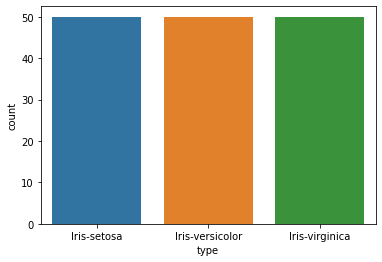

In [5]:
sns.countplot(x='type',data=hello)

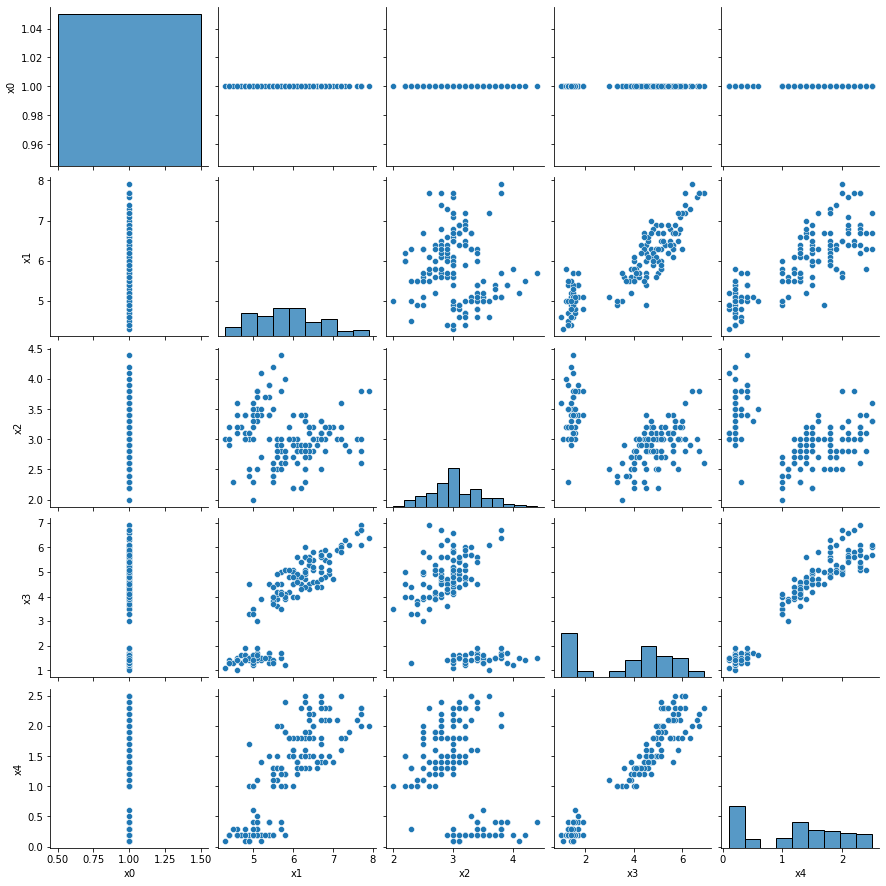

In [6]:
sns.pairplot(data=hello)

In [7]:
Ty=[]
for i in hello['type']:
    if i=='Iris-setosa':
        Ty.append('0')
    elif i=='Iris-versicolor':
        Ty.append('1')
    if i=='Iris-virginica':
        Ty.append('2')
hello['TY']=Ty

In [8]:
feature=['x0','x1','x2','x3','x4']
X = hello[feature]
y = hello.TY

In [9]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.05,random_state=84)

In [10]:
model = LinearRegression()
scores = cross_val_score(model, X_train, y_train, cv= 5)
print(scores)

[0.96297221 0.892569   0.91323684 0.94271211 0.88769499]


In [11]:
model=model.fit(X_train, y_train)
y_pred=model.predict(X_test)

In [12]:
MSE = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean squared error: ', MSE)
print('R2 Score: ', r2)

Mean squared error:  0.012937189972838773
R2 Score:  0.9823834008880493


In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
model_1=make_pipeline(StandardScaler(),LinearRegression())
model_1.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [14]:
model_1.score(X_test,y_test)

0.9823834008880493